<a href="https://colab.research.google.com/github/Mostak-Ahmmed/Data-Mining/blob/main/DT_Minimum_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("salaries.csv")

In [ ]:
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [ ]:
df.isnull().sum()

,0
company,0
job,0
degree,0
salary_more_then_100k,0


In [ ]:
df = pd.get_dummies(df, dtype=int)

In [ ]:
df.head()

,salary_more_then_100k,company_abc pharma,company_facebook,company_google,job_business manager,job_computer programmer,job_sales executive,degree_bachelors,degree_masters
0,0,0,0,1,0,0,1,1,0
1,0,0,0,1,0,0,1,0,1
2,1,0,0,1,1,0,0,1,0
3,1,0,0,1,1,0,0,0,1
4,0,0,0,1,0,1,0,1,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
y = df['salary_more_then_100k']

In [ ]:
X = df.drop('salary_more_then_100k',axis=1)

In [ ]:
X.head()

,company_abc pharma,company_facebook,company_google,job_business manager,job_computer programmer,job_sales executive,degree_bachelors,degree_masters
0,0,0,1,0,0,1,1,0
1,0,0,1,0,0,1,0,1
2,0,0,1,1,0,0,1,0
3,0,0,1,1,0,0,0,1
4,0,0,1,0,1,0,1,0


In [ ]:
y.head()

,salary_more_then_100k
0,0
1,0
2,1
3,1
4,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=1)

In [ ]:
model = DecisionTreeClassifier(criterion='entropy')

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
# company_abc pharma
	# company_facebook
  # 	company_google
  #   	job_business manager
  #     	job_computer programmer
  #       	job_sales executive
  #         	degree_bachelors
  #           	degree_masters
model.predict([[0,0,1,1,0,0,0,0]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
model.score(X_test,y_test)

0.75

In [ ]:
from sklearn.tree import plot_tree

[Text(0.6666666666666666, 0.875, 'x[1] <= 0.5\nentropy = 0.98\nsamples = 12\nvalue = [5, 7]'),
 Text(0.5, 0.625, 'x[5] <= 0.5\nentropy = 0.863\nsamples = 7\nvalue = [5, 2]'),
 Text(0.5833333333333333, 0.75, 'True  '),
 Text(0.3333333333333333, 0.375, 'x[7] <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(0.16666666666666666, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8333333333333334, 0.625, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.75, 0.75, '  False')]

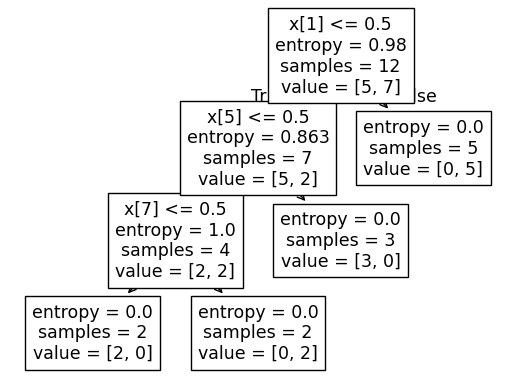

In [ ]:
plot_tree(model)

In [ ]:
1

1